# Vietnam provincial level data

In [ ]:
!pip install pymongo pymongoarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0


In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
plt.rcParams["figure.figsize"] = (8, 5)

In [ ]:
from pymongo import MongoClient
from pymongoarrow.api import find_pandas_all
from pymongoarrow.monkey import patch_all

In [ ]:
file_path = "/content/data_new.csv"
data = pd.read_csv(file_path, encoding='latin-1')

def clean_province_name(name):
    name = str(name)
    if re.search(r'[?\u4e00-\u9fff]', name):
        return None
    return name

data['Admin1Name'] = data['Admin1Name'].apply(clean_province_name)
invalid_count = data['Admin1Name'].isna().sum()
data_cleaned = data.dropna(subset=['Admin1Name'])

output_path = "/content/data_cleaned"
data_cleaned.to_csv(output_path, index=False)

print(f"Dữ liệu đã được làm sạch và lưu vào: {output_path}")
print(f"Số lượng hàng bị loại bỏ: {invalid_count}")

Dữ liệu đã được làm sạch và lưu vào: /content/data_cleaned
Số lượng hàng bị loại bỏ: 10317


In [ ]:
import pandas as pd
import re

file_path = "/content/data_new.csv"
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin1')

def clean_province_name(name):
    if pd.isna(name) or not isinstance(name, str):
        return None
    if re.search(r'[?\u4e00-\u9fff]', name):
        return None
    return name

data['Admin1Name'] = data['Admin1Name'].apply(clean_province_name)
invalid_count = data['Admin1Name'].isna().sum()
data_cleaned = data.dropna(subset=['Admin1Name'])

output_path = "/content/VN_cleaned.csv"
data_cleaned.to_csv(output_path, index=False)

print(f"Dữ liệu đã được làm sạch và lưu vào: {output_path}")
print(f"Số lượng hàng bị loại bỏ: {invalid_count}")

Dữ liệu đã được làm sạch và lưu vào: /content/VN_cleaned.csv
Số lượng hàng bị loại bỏ: 10576


In [ ]:
patch_all()

connection_string = "mongodb_connection_string"
client = MongoClient(connection_string)
db = client["OpenDengue"]
collection = db["project-tycho"]

data = find_pandas_all(collection, {})

if '_id' in data.columns:
    data = data.drop(columns=['_id'])

data.head()

,ConditionName,ConditionSNOMED,PathogenName,PathogenTaxonID,Fatalities,CountryName,CountryISO,Admin1Name,Admin1ISO,Admin2Name,CityName,PeriodStartDate,PeriodEndDate,PartOfCumulativeCountSeries,AgeRange,Subpopulation,PlaceOfAcquisition,DiagnosisCertainty,SourceName,CountValue
0,Dengue,38362002,Dengue virus,12637,0,VIET NAM,VN,AN GIANG,VN-44,NaN,NaN,1994-02-01,1994-02-28,0,0-4,None specified,NaN,NaN,Vietnam Notifiable Disease Surveillance System,9
1,Dengue,38362002,Dengue virus,12637,0,VIET NAM,VN,AN GIANG,VN-44,NaN,NaN,1994-03-01,1994-03-31,0,45-64,None specified,NaN,NaN,Vietnam Notifiable Disease Surveillance System,14
2,Dengue,38362002,Dengue virus,12637,0,VIET NAM,VN,AN GIANG,VN-44,NaN,NaN,1994-04-01,1994-04-30,0,5-14,None specified,NaN,NaN,Vietnam Notifiable Disease Surveillance System,31
3,Dengue,38362002,Dengue virus,12637,0,VIET NAM,VN,AN GIANG,VN-44,NaN,NaN,1994-05-01,1994-05-31,0,25-44,None specified,NaN,NaN,Vietnam Notifiable Disease Surveillance System,131
4,Dengue,38362002,Dengue virus,12637,0,VIET NAM,VN,AN GIANG,VN-44,NaN,NaN,1994-06-01,1994-06-30,0,15-24,None specified,NaN,NaN,Vietnam Notifiable Disease Surveillance System,256


In [ ]:
print("Dữ liệu ban đầu:")
print(data.head())
print("\nThông tin dữ liệu:")
print(data.info())

Dữ liệu ban đầu:
  ConditionName  ConditionSNOMED  PathogenName  PathogenTaxonID  Fatalities  \
0        Dengue         38362002  Dengue virus            12637           0   
1        Dengue         38362002  Dengue virus            12637           0   
2        Dengue         38362002  Dengue virus            12637           0   
3        Dengue         38362002  Dengue virus            12637           0   
4        Dengue         38362002  Dengue virus            12637           0   

  CountryName CountryISO Admin1Name Admin1ISO  Admin2Name  CityName  \
0    VIET NAM         VN   AN GIANG     VN-44         NaN       NaN   
1    VIET NAM         VN   AN GIANG     VN-44         NaN       NaN   
2    VIET NAM         VN   AN GIANG     VN-44         NaN       NaN   
3    VIET NAM         VN   AN GIANG     VN-44         NaN       NaN   
4    VIET NAM         VN   AN GIANG     VN-44         NaN       NaN   

  PeriodStartDate PeriodEndDate  PartOfCumulativeCountSeries AgeRange  \
0       

In [ ]:
data['PeriodStartDate'] = pd.to_datetime(data['PeriodStartDate'], format='%d/%m/%Y')
data['Year'] = data['PeriodStartDate'].dt.year
data['Month'] = data['PeriodStartDate'].dt.month

In [ ]:
data['AgeRange'].unique()

array(['0-130'], dtype=object)

In [ ]:
total_cases_by_province = data.groupby('Admin1Name')['CountValue'].sum().sort_values(ascending=False)

print("\nBảng 1: Tổng số ca mắc sốt xuất huyết theo tỉnh:")
print(total_cases_by_province.to_frame().reset_index())


Bảng 1: Tổng số ca mắc sốt xuất huyết theo tỉnh:
    Admin1Name  CountValue
0  HO CHI MINH    115304.0
1     AN GIANG     67580.0
2      LONG AN     42125.0
3       HA NOI     32112.0
4      CAN THO     28860.0
5      DA NANG     16782.0
6      GIA LAI     12233.0
7      KON TUM      5949.0
8    HAI PHONG      2263.0


In [ ]:
highest_province = total_cases_by_province.idxmax()
lowest_province = total_cases_by_province.idxmin()
highest_cases = total_cases_by_province.max()
lowest_cases = total_cases_by_province.min()

print(f"\nTỉnh có số ca mắc cao nhất: {highest_province} ({highest_cases:.0f} ca)")
print(f"Tỉnh có số ca mắc thấp nhất: {lowest_province} ({lowest_cases:.0f} ca)")


Tỉnh có số ca mắc cao nhất: HO CHI MINH (115304 ca)
Tỉnh có số ca mắc thấp nhất: HAI PHONG (2263 ca)


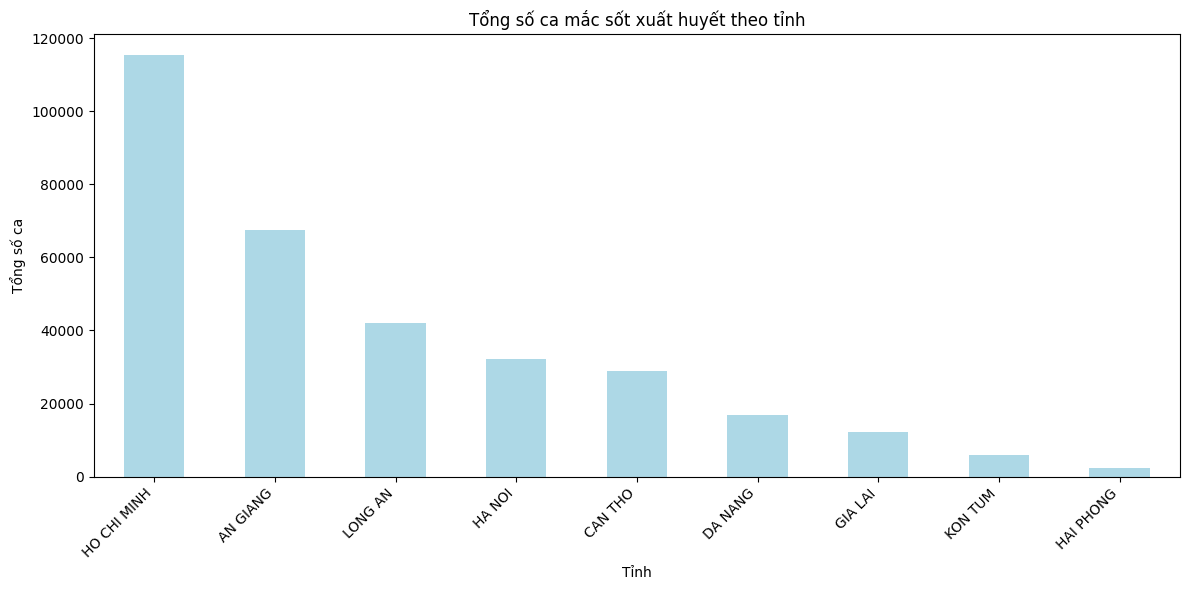

In [ ]:
plt.figure(figsize=(12, 6))
total_cases_by_province.plot(kind='bar', color='lightblue')
plt.title('Tổng số ca mắc sốt xuất huyết theo tỉnh')
plt.xlabel('Tỉnh')
plt.ylabel('Tổng số ca')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
cases_by_year_province = data.pivot_table(
    values='CountValue',
    index='Admin1Name',
    columns='Year',
    aggfunc='sum',
    fill_value=0
)

print("\nBảng 2: Số ca mắc sốt xuất huyết theo tỉnh và năm:")
print(cases_by_year_province)


Bảng 2: Số ca mắc sốt xuất huyết theo tỉnh và năm:
Year           1994    1995    1996    1997    1998    1999    2000    2001  \
Admin1Name                                                                    
AN GIANG     2376.0  2290.0  2315.0  5876.0  9648.0  2716.0  3240.0  4027.0   
CAN THO      1030.0   604.0  1498.0  5945.0  3491.0  1847.0   600.0   555.0   
DA NANG         0.0     0.0     0.0  2095.0  3986.0   220.0     5.0   141.0   
GIA LAI        69.0   121.0    92.0   675.0  3254.0   235.0   220.0   523.0   
HA NOI        145.0    31.0   119.0   108.0  3348.0   164.0   107.0   136.0   
HAI PHONG     155.0    78.0   148.0    85.0   170.0   444.0   207.0   284.0   
HO CHI MINH  1619.0  6463.0  4452.0  6493.0  6973.0   846.0  1946.0  1340.0   
KON TUM         0.0  2187.0     0.0    63.0  1660.0   164.0     8.0   153.0   
LONG AN       599.0  1784.0  4671.0  2163.0  4228.0   290.0  1640.0   650.0   

Year           2002    2003    2004    2005    2006    2007     2008     2009 

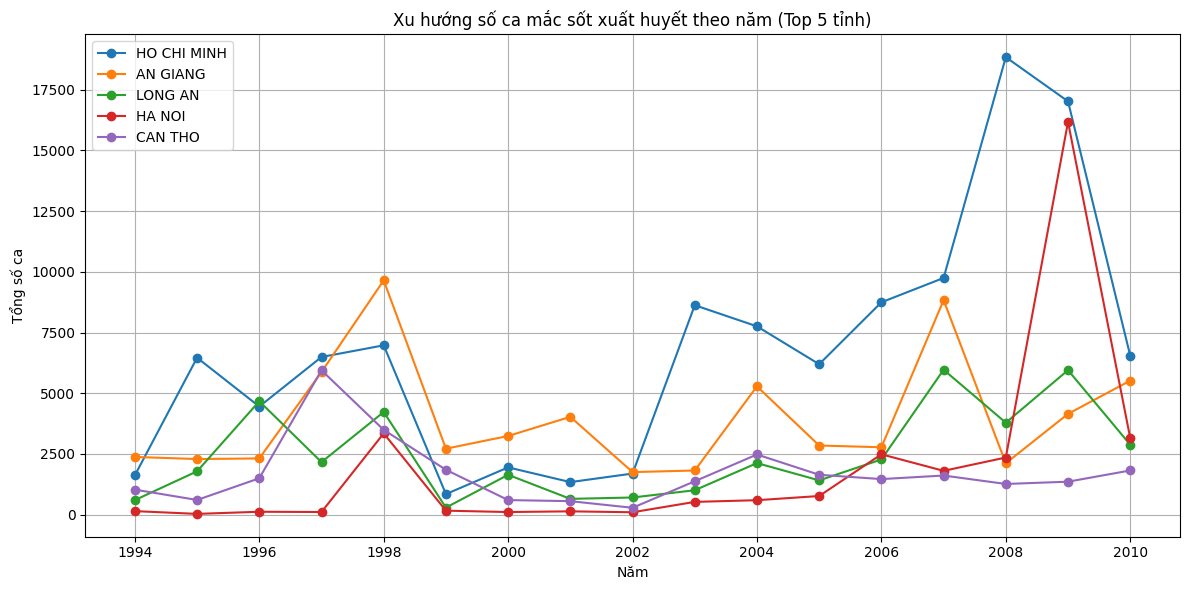

In [ ]:
top_5_provinces = total_cases_by_province.head(5).index
trend_data = data[data['Admin1Name'].isin(top_5_provinces)]
plt.figure(figsize=(12, 6))
for province in top_5_provinces:
    province_data = trend_data[trend_data['Admin1Name'] == province]
    yearly_data = province_data.groupby('Year')['CountValue'].sum()
    plt.plot(yearly_data.index, yearly_data.values, marker='o', label=province)
plt.title('Xu hướng số ca mắc sốt xuất huyết theo năm (Top 5 tỉnh)')
plt.xlabel('Năm')
plt.ylabel('Tổng số ca')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

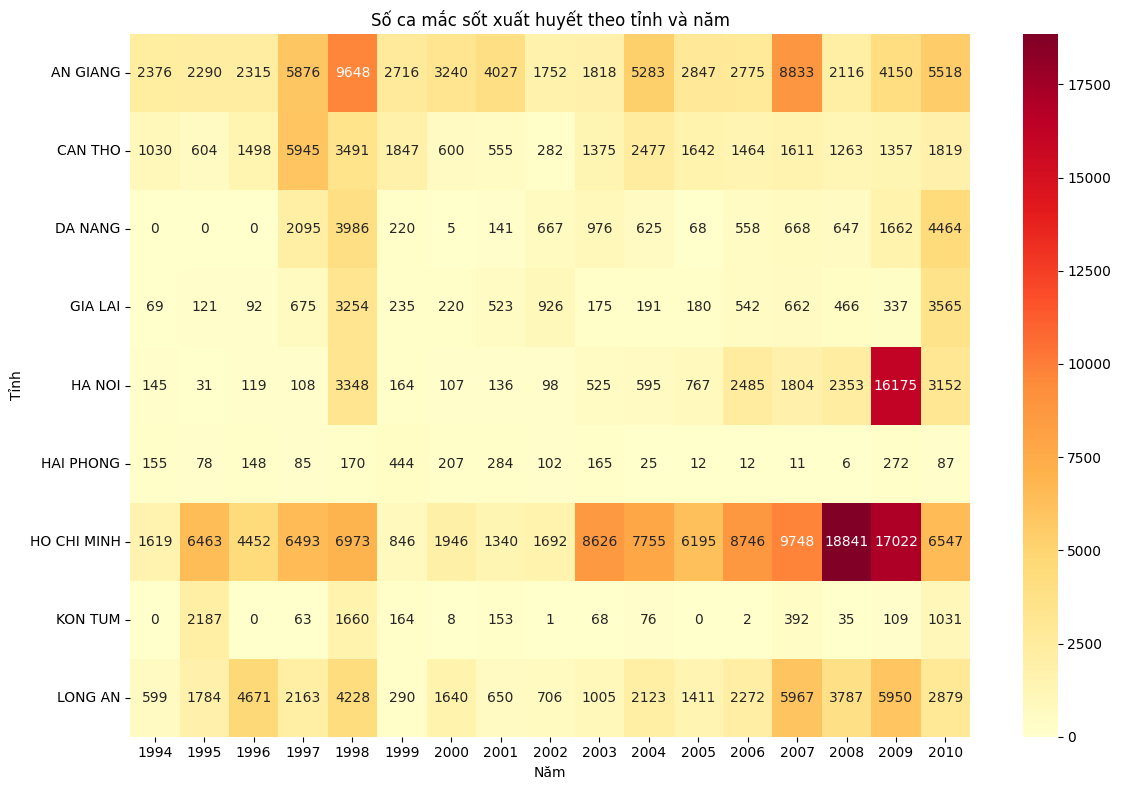

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cases_by_year_province, cmap='YlOrRd', annot=True, fmt=".0f")
plt.title('Số ca mắc sốt xuất huyết theo tỉnh và năm')
plt.xlabel('Năm')
plt.ylabel('Tỉnh')
plt.tight_layout()
plt.show()

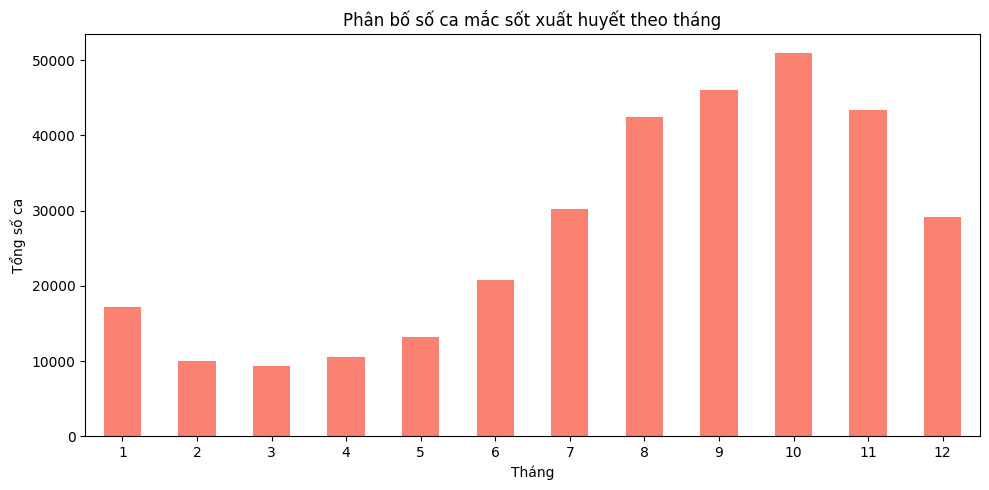

In [ ]:
cases_by_month = data.groupby('Month')['CountValue'].sum()
plt.figure(figsize=(10, 5))
cases_by_month.plot(kind='bar', color='salmon')
plt.title('Phân bố số ca mắc sốt xuất huyết theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from xgboost import XGBClassifier
import shap
import joblib
import os

In [ ]:
def prepare_data(data):
    data['PeriodStartDate'] = pd.to_datetime(data['PeriodStartDate'], format='%d/%m/%Y')
    data['Year'] = data['PeriodStartDate'].dt.year
    data['Month'] = data['PeriodStartDate'].dt.month

    median_count = data['CountValue'].median()
    data['HighCase'] = (data['CountValue'] > median_count).astype(int)

    le = LabelEncoder()
    data['Admin1Name_Encoded'] = le.fit_transform(data['Admin1Name'])

    def get_season(month):
        if month in [12, 1, 2]:
            return 0
        elif month in [3, 4, 5]:
            return 1
        elif month in [6, 7, 8]:
            return 2
        else:
            return 3

    data['Season'] = data['Month'].apply(get_season)

    data = data.sort_values(['Admin1Name', 'PeriodStartDate'])
    data['CountValue_Lag1'] = data.groupby('Admin1Name')['CountValue'].shift(1).fillna(0)
    data['CountValue_Lag2'] = data.groupby('Admin1Name')['CountValue'].shift(2).fillna(0)
    data['CountValue_Mean3'] = data.groupby('Admin1Name')['CountValue'].shift(1).rolling(window=3).mean().fillna(0)

    features = ['Year', 'Month', 'Season', 'Admin1Name_Encoded', 'CountValue_Lag1', 'CountValue_Lag2', 'CountValue_Mean3']
    X = data[features]
    y = data['HighCase']
    return X, y, data

def save_model_and_scaler(model, scaler, model_path="best_model.pkl", scaler_path="scaler.pkl"):
    joblib.dump(model, model_path)
    joblib.dump(scaler, scaler_path)
    print(f"Lưu mô hình tại: {model_path}")
    print(f"Lưu scaler tại: {scaler_path}")

def load_model_and_scaler(model_path="best_model.pkl", scaler_path="scaler.pkl"):
    if os.path.exists(model_path) and os.path.exists(scaler_path):
        model = joblib.load(model_path)
        scaler = joblib.load(scaler_path)
        print(f"Tải mô hình từ: {model_path}")
        print(f"Tải scaler từ: {scaler_path}")
        return model, scaler
    else:
        print("Không tìm thấy mô hình hoặc scaler!")
        return None, None

def train_and_evaluate(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    print(f"\nĐánh giá model: {name}")
    print(classification_report(y_test, y_pred))
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    print(f"Cross-validation F1-score: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC: {roc_auc:.3f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Ma trận nhầm lẫn - {name}')
    plt.xlabel('Dự đoán')
    plt.ylabel('Thực tế')
    plt.show()

    return model, roc_auc

In [ ]:
patch_all()

connection_string = "mongodb_connection_string"
client = MongoClient(connection_string)
db = client["OpenDengue"]
collection = db["project-tycho"]

data = find_pandas_all(collection, {})

if '_id' in data.columns:
    data = data.drop(columns=['_id'])

data.head()

,ConditionName,ConditionSNOMED,PathogenName,PathogenTaxonID,Fatalities,CountryName,CountryISO,Admin1Name,Admin1ISO,Admin2Name,CityName,PeriodStartDate,PeriodEndDate,PartOfCumulativeCountSeries,AgeRange,Subpopulation,PlaceOfAcquisition,DiagnosisCertainty,SourceName,CountValue
0,Dengue,38362002,Dengue virus,12637,0,VIET NAM,VN,AN GIANG,VN-44,NaN,NaN,1994-02-01,1994-02-28,0,0-4,None specified,NaN,NaN,Vietnam Notifiable Disease Surveillance System,9
1,Dengue,38362002,Dengue virus,12637,0,VIET NAM,VN,AN GIANG,VN-44,NaN,NaN,1994-03-01,1994-03-31,0,45-64,None specified,NaN,NaN,Vietnam Notifiable Disease Surveillance System,14
2,Dengue,38362002,Dengue virus,12637,0,VIET NAM,VN,AN GIANG,VN-44,NaN,NaN,1994-04-01,1994-04-30,0,5-14,None specified,NaN,NaN,Vietnam Notifiable Disease Surveillance System,31
3,Dengue,38362002,Dengue virus,12637,0,VIET NAM,VN,AN GIANG,VN-44,NaN,NaN,1994-05-01,1994-05-31,0,25-44,None specified,NaN,NaN,Vietnam Notifiable Disease Surveillance System,131
4,Dengue,38362002,Dengue virus,12637,0,VIET NAM,VN,AN GIANG,VN-44,NaN,NaN,1994-06-01,1994-06-30,0,15-24,None specified,NaN,NaN,Vietnam Notifiable Disease Surveillance System,256


In [ ]:
X, y, data = prepare_data(data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}


Đánh giá model: Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       269
           1       0.93      0.80      0.86       268

    accuracy                           0.87       537
   macro avg       0.88      0.87      0.87       537
weighted avg       0.88      0.87      0.87       537

Cross-validation F1-score: 0.864 (±0.030)
ROC-AUC: 0.940


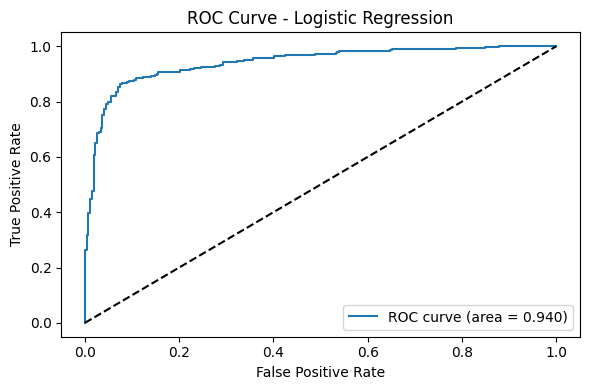

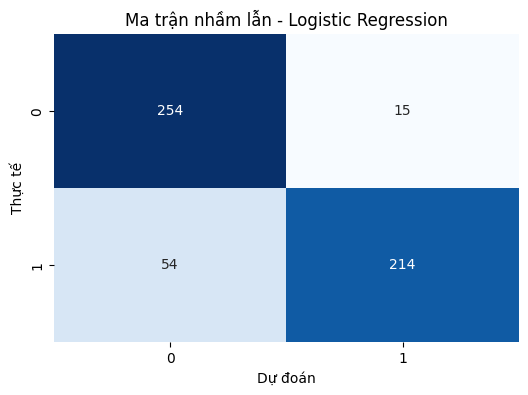


Đánh giá model: Random Forest
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       269
           1       0.92      0.90      0.91       268

    accuracy                           0.91       537
   macro avg       0.91      0.91      0.91       537
weighted avg       0.91      0.91      0.91       537

Cross-validation F1-score: 0.901 (±0.020)
ROC-AUC: 0.954


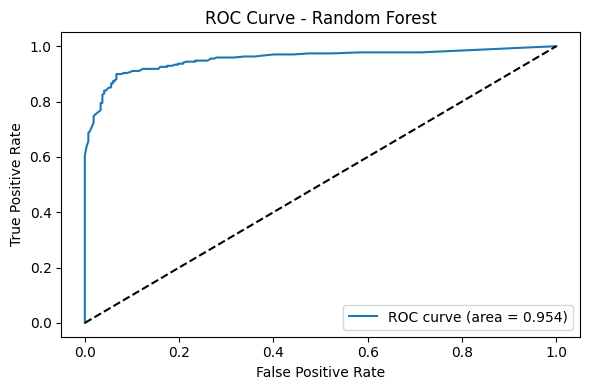

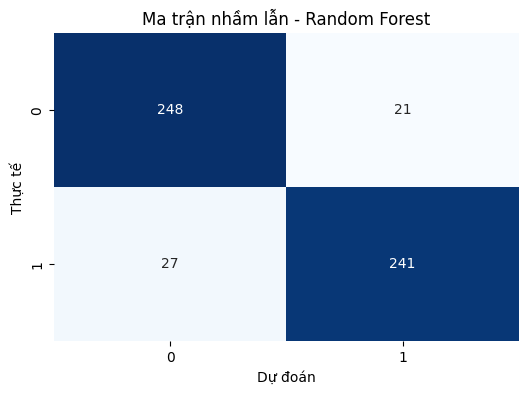


Đánh giá model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       269
           1       0.93      0.89      0.91       268

    accuracy                           0.91       537
   macro avg       0.91      0.91      0.91       537
weighted avg       0.91      0.91      0.91       537

Cross-validation F1-score: 0.902 (±0.015)
ROC-AUC: 0.962


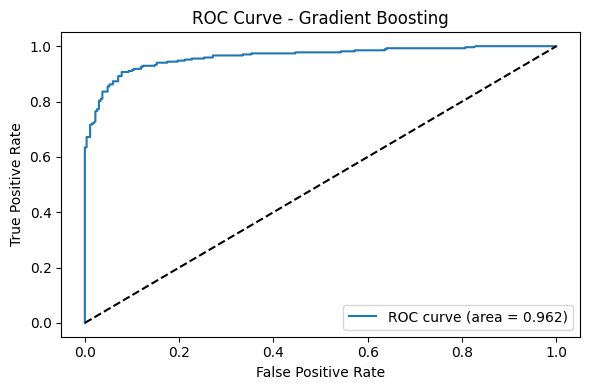

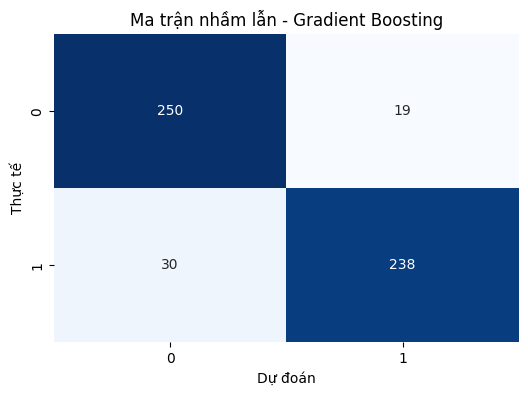


Mô hình tốt nhất: Gradient Boosting với ROC-AUC: 0.962


In [ ]:
best_model = None
best_roc_auc = 0
best_model_name = ""
for name, model in models.items():
    trained_model, roc_auc = train_and_evaluate(model, X_train, X_test, y_train, y_test, name)
    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_model = trained_model
        best_model_name = name

print(f"\nMô hình tốt nhất: {best_model_name} với ROC-AUC: {best_roc_auc:.3f}")

In [ ]:
save_model_and_scaler(best_model, scaler)

Lưu mô hình tại: best_model.pkl
Lưu scaler tại: scaler.pkl


Phân tích bệnh sốt xuất huyết theo nhóm tuổi:
--------------------------------------------------
Nhóm tuổi  | Số ca mắc    | Tỷ lệ (%) 
--------------------------------------------------
0-4        | 41531        | 12.8      
5-14       | 102077       | 31.6      
15-24      | 80842        | 25.0      
25-44      | 67411        | 20.9      
45-64      | 26808        | 8.3       
65+        | 4539         | 1.4       
--------------------------------------------------
Tổng cộng  | 323208       | 100%      


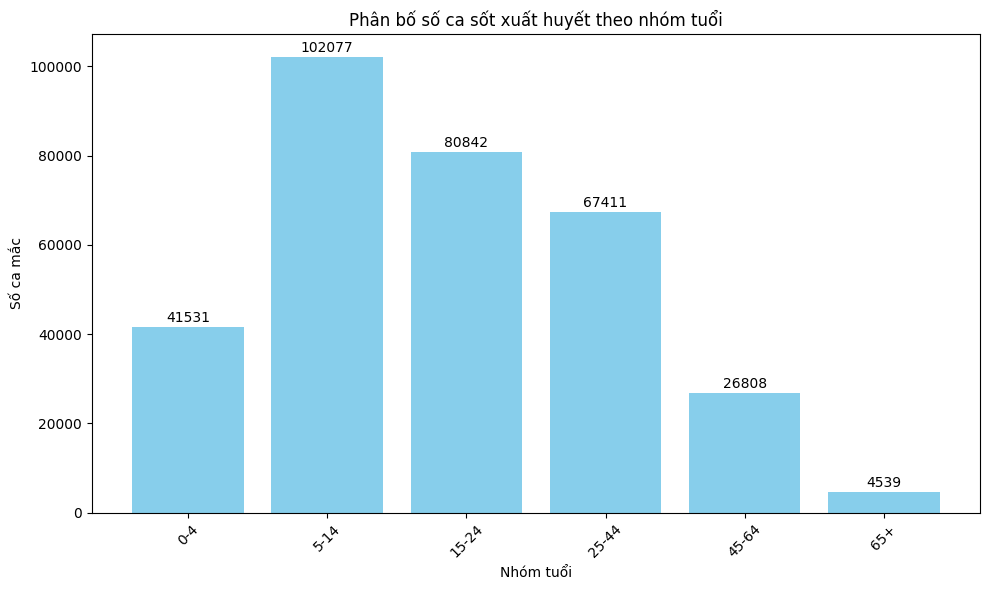

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

if 'AgeRange' not in data.columns:
    print("Lỗi: Cột 'AgeRange' không tồn tại. Các cột hiện có:", data.columns.tolist())
    exit()

valid_age_groups = ["0-4", "5-14", "15-24", "25-44", "45-64", "65+"]
df_filtered = data[data['AgeRange'].isin(valid_age_groups)]

age_group_counts = df_filtered.groupby('AgeRange')['CountValue'].sum()
total_cases = age_group_counts.sum()

age_groups = ["0-4", "5-14", "15-24", "25-44", "45-64", "65+"]
counts = [age_group_counts.get(age, 0) for age in age_groups]
percentages = [round((count / total_cases) * 100, 1) for count in counts]

print("Phân tích bệnh sốt xuất huyết theo nhóm tuổi:")
print("-" * 50)
print(f"{'Nhóm tuổi':<10} | {'Số ca mắc':<12} | {'Tỷ lệ (%)':<10}")
print("-" * 50)
for age, count, percent in zip(age_groups, counts, percentages):
    print(f"{age:<10} | {count:<12} | {percent:<10}")
print("-" * 50)
print(f"{'Tổng cộng':<10} | {total_cases:<12} | {'100%':<10}")

plt.figure(figsize=(10, 6))
plt.bar(age_groups, counts, color='skyblue')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số ca mắc')
plt.title('Phân bố số ca sốt xuất huyết theo nhóm tuổi')
plt.xticks(rotation=45)

for i, count in enumerate(counts):
    plt.text(i, count + 500, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()